In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plot_series(time,series,start=0,end=None,format='-'):
  plt.plot(time[start:end],series[start:end],format)
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.grid(True)

In [ ]:
def trend(time,slope=0):
  return slope*time

In [ ]:
def seasonal_pattern(season_time):
  return np.where(season_time < 0.1,
                    np.cos(season_time * 6 * np.pi),
                    2 / np.exp(9 * season_time))

In [ ]:
def seasonality(time,period,amplitude=1,phase=0):
  season_time = ((time+phase) % period) / period
  return amplitude*seasonal_pattern(season_time)

In [ ]:
def noise(time,noise_level=1,seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time))*noise_level

In [ ]:

time=np.arange(10*365 + 1 , dtype='float32')
baseline = 10
amplitude = 40
slope = 0.005
noise_level = 3

In [ ]:
series = baseline + trend(time,slope) + seasonality(time,period=365,amplitude=amplitude)
series += noise(time,noise_level,seed=51)

In [ ]:
split_time = 3000
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

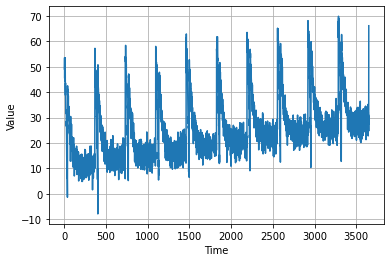

In [ ]:
plot_series(time,series)

In [ ]:
def windowed_dataset(series,window_size,batch_size,shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1,shift=1,drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [ ]:
x_train = series[:split_time]
time_train = time[:split_time]
x_valid = series[split_time:]
time_valid = time[split_time:]

#Using SimpleRNN in the Model


In [ ]:
#using RNN

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
dataset = windowed_dataset(x_train,window_size,batch_size,shuffle_buffer_size)

In [ ]:
model_rnn0 = tf.keras.Sequential([
                                  tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=-1)),
                                  tf.keras.layers.SimpleRNN(64,return_sequences=True),
                                  tf.keras.layers.SimpleRNN(64),
                                  tf.keras.layers.Dense(1),
                                  tf.keras.layers.Lambda(lambda x: x*100.0)
])

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8*10**(epoch/20))
optimizer_rnn0 = tf.keras.optimizers.SGD(lr=1e-8,momentum=0.9)

In [ ]:
model_rnn0.compile(loss=tf.keras.losses.Huber(),optimizer=optimizer_rnn0,metrics=['mae'])

In [ ]:
history_rnn0 = model_rnn0.fit(dataset,epochs=100,callbacks=[lr_schedule])

Epoch 1/100
94/94 [==============================] - 2s 18ms/step - loss: 172.5327 - mae: 173.0327 - lr: 1.0000e-08
Epoch 2/100
94/94 [==============================] - 2s 18ms/step - loss: 157.9179 - mae: 158.4179 - lr: 1.1220e-08
Epoch 3/100
94/94 [==============================] - 2s 19ms/step - loss: 139.6182 - mae: 140.1182 - lr: 1.2589e-08
Epoch 4/100
94/94 [==============================] - 2s 19ms/step - loss: 116.1850 - mae: 116.6850 - lr: 1.4125e-08
Epoch 5/100
94/94 [==============================] - 1s 12ms/step - loss: 85.3879 - mae: 85.8879 - lr: 1.5849e-08
Epoch 6/100
94/94 [==============================] - 1s 11ms/step - loss: 46.9080 - mae: 47.4078 - lr: 1.7783e-08
Epoch 7/100
94/94 [==============================] - 1s 11ms/step - loss: 15.6350 - mae: 16.1279 - lr: 1.9953e-08
Epoch 8/100
94/94 [==============================] - 1s 11ms/step - loss: 11.9581 - mae: 12.4472 - lr: 2.2387e-08
Epoch 9/100
94/94 [==============================] - 1s 11ms/step - loss: 11.459

(1e-08, 0.0001, 0.0, 30.0)

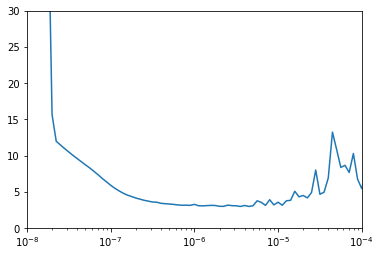

In [ ]:
plt.semilogx(history_rnn0.history['lr'],history_rnn0.history['loss'])
plt.axis([1e-8,1e-4,0,30])

selecting new optimal lr as 2.8184e-06 since it has the least loss


In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
dataset = windowed_dataset(x_train,window_size,batch_size,shuffle_buffer_size)

In [ ]:
model_rnn = tf.keras.Sequential([
                                 tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=-1)),
                                 tf.keras.layers.SimpleRNN(64,return_sequences=True),
                                 tf.keras.layers.SimpleRNN(64),
                                 tf.keras.layers.Dense(1),
                                 tf.keras.layers.Lambda(lambda x : x*100.0)
])

In [ ]:
optimizer_rnn = tf.keras.optimizers.SGD(lr=2.8184e-06,momentum=0.9)
model_rnn.compile(loss=tf.keras.losses.Huber(),optimizer=optimizer_rnn,metrics=['mae'])

In [ ]:
history_rnn = model_rnn.fit(dataset,epochs=100,verbose=1)

Epoch 1/100
94/94 [==============================] - 1s 11ms/step - loss: 23.0803 - mae: 23.5686
Epoch 2/100
94/94 [==============================] - 1s 11ms/step - loss: 4.2414 - mae: 4.7163
Epoch 3/100
94/94 [==============================] - 1s 11ms/step - loss: 3.3607 - mae: 3.8265
Epoch 4/100
94/94 [==============================] - 1s 11ms/step - loss: 3.2979 - mae: 3.7673
Epoch 5/100
94/94 [==============================] - 1s 11ms/step - loss: 3.1518 - mae: 3.6198
Epoch 6/100
94/94 [==============================] - 1s 11ms/step - loss: 3.0108 - mae: 3.4758
Epoch 7/100
94/94 [==============================] - 1s 11ms/step - loss: 3.0356 - mae: 3.5026
Epoch 8/100
94/94 [==============================] - 1s 12ms/step - loss: 3.0919 - mae: 3.5604
Epoch 9/100
94/94 [==============================] - 1s 11ms/step - loss: 2.9763 - mae: 3.4416
Epoch 10/100
94/94 [==============================] - 1s 11ms/step - loss: 2.9441 - mae: 3.4111
Epoch 11/100
94/94 [===========================

In [ ]:
forecast_rnn= []
for time in range(len(series)-window_size):
  forecast_rnn.append(model_rnn.predict(series[time:time+window_size][np.newaxis]))

In [ ]:
forecast_rnn = forecast_rnn[split_time-window_size:]
results_rnn = np.array(forecast_rnn)[:,0,0]

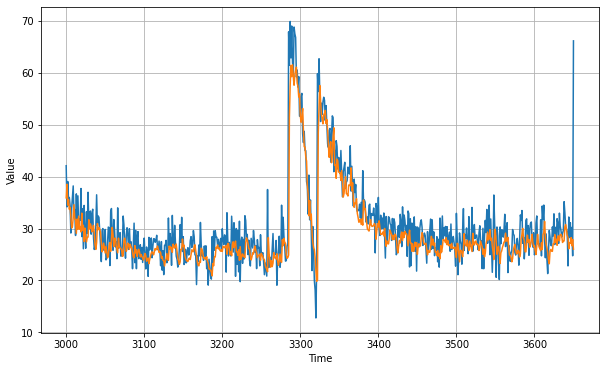

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time_valid,x_valid)
plot_series(time_valid,results_rnn)

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid,results_rnn).numpy()

3.143757

#Now Using an LSTM in the Model


In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
dataset = windowed_dataset(x_train,window_size,batch_size,shuffle_buffer_size)
#model_lstm0 checking the lr_schedule with LSTM

In [ ]:
model_lstm0 = tf.keras.Sequential([
                             tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=-1)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(1),
                             tf.keras.layers.Lambda(lambda x:x*1000)
])

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8*10**(epoch/20))
optimizer0 = tf.keras.optimizers.SGD(lr=1e-8,momentum=0.9)

In [ ]:
model_lstm0.compile(loss=tf.keras.losses.Huber(),optimizer=optimizer0,metrics=['mae'])

In [ ]:
history_lstm0 = model_lstm0.fit(dataset,epochs=100,callbacks=[lr_schedule])

Epoch 1/100
94/94 [==============================] - 3s 27ms/step - loss: 123.1699 - mae: 123.6698 - lr: 1.0000e-08
Epoch 2/100
94/94 [==============================] - 3s 28ms/step - loss: 20.3034 - mae: 20.7934 - lr: 1.1220e-08
Epoch 3/100
94/94 [==============================] - 3s 28ms/step - loss: 19.1846 - mae: 19.6742 - lr: 1.2589e-08
Epoch 4/100
94/94 [==============================] - 3s 29ms/step - loss: 18.6127 - mae: 19.1022 - lr: 1.4125e-08
Epoch 5/100
94/94 [==============================] - 3s 29ms/step - loss: 18.1114 - mae: 18.5996 - lr: 1.5849e-08
Epoch 6/100
94/94 [==============================] - 3s 30ms/step - loss: 17.5068 - mae: 17.9954 - lr: 1.7783e-08
Epoch 7/100
94/94 [==============================] - 3s 29ms/step - loss: 17.3106 - mae: 17.8006 - lr: 1.9953e-08
Epoch 8/100
94/94 [==============================] - 3s 28ms/step - loss: 16.5688 - mae: 17.0582 - lr: 2.2387e-08
Epoch 9/100
94/94 [==============================] - 3s 28ms/step - loss: 16.0638 - ma

(1e-08, 0.0001, 0.0, 30.0)

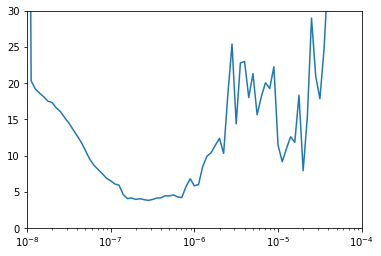

In [ ]:
plt.semilogx(history0.history['lr'],history0.history['loss'])
plt.axis([1e-8,1e-4,0,30])

Now using lr as 2.8184e-07 since there was minimum loss on it 


In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
dataset1 = windowed_dataset(x_train,window_size,batch_size,shuffle_buffer_size)
model_lstm = tf.keras.Sequential([
                              tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                              tf.keras.layers.Dense(1),
                              tf.keras.layers.Lambda(lambda x:x*100)
])
model_lstm.compile(loss=tf.keras.losses.Huber(),optimizer=tf.keras.optimizers.SGD(lr=2.8184e-07,momentum=.9),metrics=['mae'])

In [ ]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              multiple                  0         
_________________________________________________________________
bidirectional (Bidirectional multiple                  8704      
_________________________________________________________________
bidirectional_1 (Bidirection multiple                  24832     
_________________________________________________________________
dense (Dense)                multiple                  65        
_________________________________________________________________
lambda_1 (Lambda)            multiple                  0         
Total params: 33,601
Trainable params: 33,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm = model_lstm.fit(dataset,epochs=100,verbose=1)

Epoch 1/100
94/94 [==============================] - 3s 27ms/step - loss: 7.3218 - mae: 7.7994
Epoch 2/100
94/94 [==============================] - 3s 28ms/step - loss: 6.2822 - mae: 6.7537
Epoch 3/100
94/94 [==============================] - 3s 27ms/step - loss: 5.9047 - mae: 6.3757
Epoch 4/100
94/94 [==============================] - 3s 27ms/step - loss: 5.6642 - mae: 6.1332
Epoch 5/100
94/94 [==============================] - 3s 27ms/step - loss: 5.5033 - mae: 5.9743
Epoch 6/100
94/94 [==============================] - 3s 28ms/step - loss: 5.3863 - mae: 5.8556
Epoch 7/100
94/94 [==============================] - 3s 28ms/step - loss: 5.2923 - mae: 5.7601
Epoch 8/100
94/94 [==============================] - 3s 29ms/step - loss: 5.2143 - mae: 5.6811
Epoch 9/100
94/94 [==============================] - 3s 30ms/step - loss: 5.1444 - mae: 5.6115
Epoch 10/100
94/94 [==============================] - 3s 28ms/step - loss: 5.0813 - mae: 5.5502
Epoch 11/100
94/94 [=============================

In [ ]:
forecast_lstm = []
for time in range(len(series)-window_size):
  forecast_lstm.append(model_lstm.predict(series[time:time+window_size][np.newaxis]))

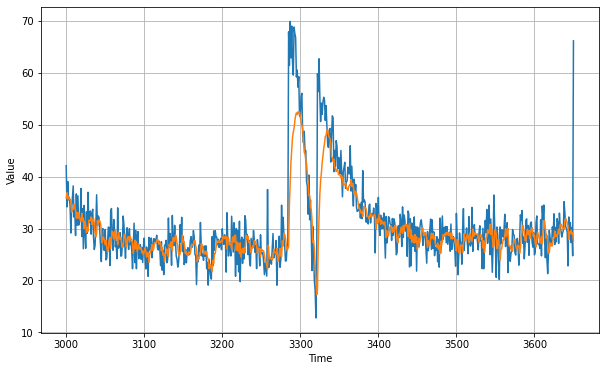

In [ ]:
forecast_lstm = forecast_lstm[split_time-window_size:]
results_lstm = np.array(forecast_lstm)[:,0,0]
plt.figure(figsize=(10,6))
plot_series(time_valid,x_valid)
plot_series(time_valid,results_lstm)
plt.show()

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid,results_lstm).numpy()

3.331475

Ploting the original , with RNN , and with LSTM

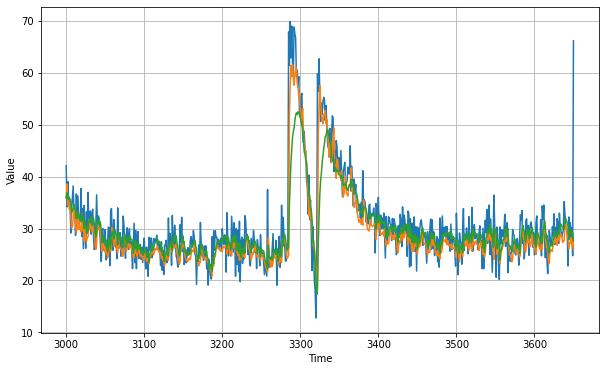

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time_valid,x_valid)
plot_series(time_valid,results_rnn)
plot_series(time_valid,results_lstm)

#Conclusion
SimpleRNN with 64 is used to fit the series with trend and seasonality better than with Bidirectional LSTM with 32 (since Bidirectional overall is 32*2 = 64 ) 
The sudden peak is better predicted in the SimpleRNN network